In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Lasso,ElasticNet,Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures,StandardScaler,OneHotEncoder
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base  import BaseEstimator,TransformerMixin
import joblib

In [2]:
data=pd.read_csv('dataset.csv')
data

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
196,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
197,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
198,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [3]:
data.columns

Index(['3', '?', 'alfa-romero', 'gas', 'std', 'two', 'convertible', 'rwd',
       'front', '88.60', '168.80', '64.10', '48.80', '2548', 'dohc', 'four',
       '130', 'mpfi', '3.47', '2.68', '9.00', '111', '5000', '21', '27',
       '13495'],
      dtype='object')

In [4]:
data=data.rename(columns={'3':'symboling', '?':'normalised_losses', 'alfa-romero':'make', 'gas':'fuel_type','std':'aspiration',
                          'two':'num_of_doors', 'convertible':'car_style', 'rwd':'drive_wheels', 'front':'engine_location', 
                          '88.60':'wheel_base', '168.80':'length', '64.10':'width', '48.80':'height', '2548':'curb_weight',
                          'dohc':'engine_type', 'four':'num_of_cylinders', '130':'engine_size', 'mpfi':'fuel_system', 
                          '3.47':'bore', '2.68':'stroke', '9.00':'compression_ratio', '111':'horse_power', '5000':'peak_rpm', 
                          '21':'city_mpg', '27':'highway_mpg','13495':'price'})

In [5]:
data

,symboling,normalised_losses,make,fuel_type,aspiration,num_of_doors,car_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
196,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
197,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
198,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


# data exploration

In [6]:
data.shape

(200, 26)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          200 non-null    int64  
 1   normalised_losses  200 non-null    object 
 2   make               200 non-null    object 
 3   fuel_type          200 non-null    object 
 4   aspiration         200 non-null    object 
 5   num_of_doors       200 non-null    object 
 6   car_style          200 non-null    object 
 7   drive_wheels       200 non-null    object 
 8   engine_location    200 non-null    object 
 9   wheel_base         200 non-null    float64
 10  length             200 non-null    float64
 11  width              200 non-null    float64
 12  height             200 non-null    float64
 13  curb_weight        200 non-null    int64  
 14  engine_type        200 non-null    object 
 15  num_of_cylinders   200 non-null    object 
 16  engine_size        200 non

# checking/ handling null values and duplicates

In [8]:
data.isna().sum()

symboling            0
normalised_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
car_style            0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horse_power          0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          200 non-null    int64  
 1   normalised_losses  200 non-null    object 
 2   make               200 non-null    object 
 3   fuel_type          200 non-null    object 
 4   aspiration         200 non-null    object 
 5   num_of_doors       200 non-null    object 
 6   car_style          200 non-null    object 
 7   drive_wheels       200 non-null    object 
 8   engine_location    200 non-null    object 
 9   wheel_base         200 non-null    float64
 10  length             200 non-null    float64
 11  width              200 non-null    float64
 12  height             200 non-null    float64
 13  curb_weight        200 non-null    int64  
 14  engine_type        200 non-null    object 
 15  num_of_cylinders   200 non-null    object 
 16  engine_size        200 non

In [11]:
data['car_style'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [12]:
data['num_of_doors'].unique()

array(['two', 'four', '?'], dtype=object)

In [13]:
data[data['normalised_losses']=='?']

,symboling,normalised_losses,make,fuel_type,aspiration,num_of_doors,car_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
12,1,?,bmw,gas,std,four,sedan,rwd,front,103.5,...,164,mpfi,3.31,3.19,9.0,121,4250,20,25,24565
13,0,?,bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760
14,0,?,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315
15,0,?,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880
41,0,?,isuzu,gas,std,four,sedan,rwd,front,94.3,...,111,2bbl,3.31,3.23,8.5,78,4800,24,29,6785
42,2,?,isuzu,gas,std,two,hatchback,rwd,front,96.0,...,119,spfi,3.43,3.23,9.2,90,5000,24,29,11048


In [14]:
data=data.replace({'?':np.nan})

In [15]:
data['bore'].unique()

array(['3.47', '2.68', '3.19', '3.13', '3.50', '3.31', '3.62', '2.91',
       '3.03', '2.97', '3.34', '3.60', '2.92', '3.15', '3.43', '3.63',
       '3.54', '3.08', nan, '3.39', '3.76', '3.58', '3.46', '3.80',
       '3.78', '3.17', '3.35', '3.59', '2.99', '3.33', '3.70', '3.61',
       '3.94', '3.74', '2.54', '3.05', '3.27', '3.24', '3.01'],
      dtype=object)

In [16]:
data

,symboling,normalised_losses,make,fuel_type,aspiration,num_of_doors,car_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
196,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
197,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
198,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [17]:
data.isna().sum()

symboling             0
normalised_losses    36
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
car_style             0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horse_power           2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

In [18]:
data.duplicated().sum()

0

In [19]:
data[data['bore'].isna()]     #null values are present on the same row

,symboling,normalised_losses,make,fuel_type,aspiration,num_of_doors,car_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horse_power,peak_rpm,city_mpg,highway_mpg,price
51,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,10945
52,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,11845
53,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,13645
54,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,NaN,NaN,9.4,135,6000,16,23,15645


In [20]:
data[data['horse_power'].isna()] #null values are present on the same row

,symboling,normalised_losses,make,fuel_type,aspiration,num_of_doors,car_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horse_power,peak_rpm,city_mpg,highway_mpg,price
125,0,NaN,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,NaN,NaN,23,31,9295
126,2,NaN,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,NaN,NaN,23,31,9895


In [21]:
data[data['num_of_doors'].isna()] #null values are present on the same row

,symboling,normalised_losses,make,fuel_type,aspiration,num_of_doors,car_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horse_power,peak_rpm,city_mpg,highway_mpg,price
25,1,148,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558
59,0,NaN,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64,4650,36,42,10795


In [22]:
data=data.dropna()

In [23]:
data.isna().sum()

symboling            0
normalised_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
car_style            0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horse_power          0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [24]:
data.shape

(159, 26)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159 entries, 2 to 199
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          159 non-null    int64  
 1   normalised_losses  159 non-null    object 
 2   make               159 non-null    object 
 3   fuel_type          159 non-null    object 
 4   aspiration         159 non-null    object 
 5   num_of_doors       159 non-null    object 
 6   car_style          159 non-null    object 
 7   drive_wheels       159 non-null    object 
 8   engine_location    159 non-null    object 
 9   wheel_base         159 non-null    float64
 10  length             159 non-null    float64
 11  width              159 non-null    float64
 12  height             159 non-null    float64
 13  curb_weight        159 non-null    int64  
 14  engine_type        159 non-null    object 
 15  num_of_cylinders   159 non-null    object 
 16  engine_size        159 non-null

In [26]:
data['peak_rpm'].unique()

array(['5500', '5800', '4250', '5100', '5400', '5000', '4800', '6000',
       '4750', '4350', '5200', '4150', '5600', '5250', '4900', '4400',
       '4500', '6600', '4200', '5300'], dtype=object)

In [27]:
data['peak_rpm']=data['peak_rpm'].astype('int')

C:\Users\DELL\AppData\Local\Temp\ipykernel_13244\3746442801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['peak_rpm']=data['peak_rpm'].astype('int')


In [28]:
data['horse_power'].unique()

array(['102', '115', '110', '140', '101', '121', '48', '70', '68', '88',
       '145', '58', '76', '60', '86', '100', '176', '84', '120', '123',
       '155', '116', '69', '55', '97', '152', '160', '200', '95', '142',
       '143', '73', '82', '94', '111', '62', '56', '112', '92', '161',
       '156', '52', '85', '90', '114', '162', '134', '106'], dtype=object)

In [29]:
data['horse_power']=data['horse_power'].astype('int')

C:\Users\DELL\AppData\Local\Temp\ipykernel_13244\3310413805.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['horse_power']=data['horse_power'].astype('int')


In [30]:
data['bore'].unique()

array(['3.19', '3.13', '3.50', '3.31', '2.91', '3.03', '2.97', '3.34',
       '3.60', '2.92', '3.15', '3.63', '3.08', '3.39', '3.76', '3.58',
       '3.46', '3.17', '3.35', '2.99', '3.33', '3.43', '3.70', '3.61',
       '3.94', '3.54', '2.54', '3.62', '3.05', '3.27', '3.24', '3.01',
       '3.78'], dtype=object)

In [31]:
data['bore']=data['bore'].astype('float')

C:\Users\DELL\AppData\Local\Temp\ipykernel_13244\1733838565.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bore']=data['bore'].astype('float')


In [32]:
data['stroke'].unique()

array(['3.40', '2.80', '3.19', '3.03', '3.11', '3.23', '3.39', '3.46',
       '3.90', '3.41', '3.07', '3.58', '4.17', '3.15', '3.16', '3.64',
       '3.10', '3.29', '3.47', '3.27', '3.52', '2.19', '3.21', '2.07',
       '2.36', '2.64', '3.35', '3.08', '3.50', '3.54', '2.87'],
      dtype=object)

In [33]:
data['stroke']=data['stroke'].astype('float')

C:\Users\DELL\AppData\Local\Temp\ipykernel_13244\2167592619.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['stroke']=data['stroke'].astype('float')


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159 entries, 2 to 199
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          159 non-null    int64  
 1   normalised_losses  159 non-null    object 
 2   make               159 non-null    object 
 3   fuel_type          159 non-null    object 
 4   aspiration         159 non-null    object 
 5   num_of_doors       159 non-null    object 
 6   car_style          159 non-null    object 
 7   drive_wheels       159 non-null    object 
 8   engine_location    159 non-null    object 
 9   wheel_base         159 non-null    float64
 10  length             159 non-null    float64
 11  width              159 non-null    float64
 12  height             159 non-null    float64
 13  curb_weight        159 non-null    int64  
 14  engine_type        159 non-null    object 
 15  num_of_cylinders   159 non-null    object 
 16  engine_size        159 non-null

In [35]:
data.select_dtypes(exclude=np.number)

,normalised_losses,make,fuel_type,aspiration,num_of_doors,car_style,drive_wheels,engine_location,engine_type,num_of_cylinders,fuel_system
2,164,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
3,164,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
5,158,audi,gas,std,four,sedan,fwd,front,ohc,five,mpfi
7,158,audi,gas,turbo,four,sedan,fwd,front,ohc,five,mpfi
8,192,bmw,gas,std,two,sedan,rwd,front,ohc,four,mpfi
...,...,...,...,...,...,...,...,...,...,...,...
195,95,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi
196,95,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
197,95,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
198,95,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [36]:
data['normalised_losses'].unique()

array(['164', '158', '192', '188', '121', '98', '81', '118', '148', '110',
       '145', '137', '101', '78', '106', '85', '107', '104', '113', '129',
       '115', '93', '142', '161', '153', '125', '128', '122', '103',
       '168', '108', '194', '231', '119', '154', '74', '186', '150', '83',
       '102', '89', '87', '77', '91', '134', '65', '197', '90', '94',
       '256', '95'], dtype=object)

In [37]:
data['normalised_losses']=data['normalised_losses'].astype('int')

C:\Users\DELL\AppData\Local\Temp\ipykernel_13244\2273691169.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['normalised_losses']=data['normalised_losses'].astype('int')


In [38]:
data['normalised_losses'].unique()

array([164, 158, 192, 188, 121,  98,  81, 118, 148, 110, 145, 137, 101,
        78, 106,  85, 107, 104, 113, 129, 115,  93, 142, 161, 153, 125,
       128, 122, 103, 168, 108, 194, 231, 119, 154,  74, 186, 150,  83,
       102,  89,  87,  77,  91, 134,  65, 197,  90,  94, 256,  95])

In [39]:
data.select_dtypes(include=np.number)

,symboling,normalised_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horse_power,peak_rpm,city_mpg,highway_mpg,price
2,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450
5,1,158,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.5,110,5500,19,25,17710
7,1,158,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.3,140,5500,17,20,23875
8,2,192,101.2,176.8,64.8,54.3,2395,108,3.50,2.80,8.8,101,5800,23,29,16430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1,95,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845
196,-1,95,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045
197,-1,95,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485
198,-1,95,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470


In [40]:
data.select_dtypes(exclude=np.number)

,make,fuel_type,aspiration,num_of_doors,car_style,drive_wheels,engine_location,engine_type,num_of_cylinders,fuel_system
2,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
3,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
5,audi,gas,std,four,sedan,fwd,front,ohc,five,mpfi
7,audi,gas,turbo,four,sedan,fwd,front,ohc,five,mpfi
8,bmw,gas,std,two,sedan,rwd,front,ohc,four,mpfi
...,...,...,...,...,...,...,...,...,...,...
195,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi
196,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
197,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
198,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


# exploratory data analysis

<Axes: >

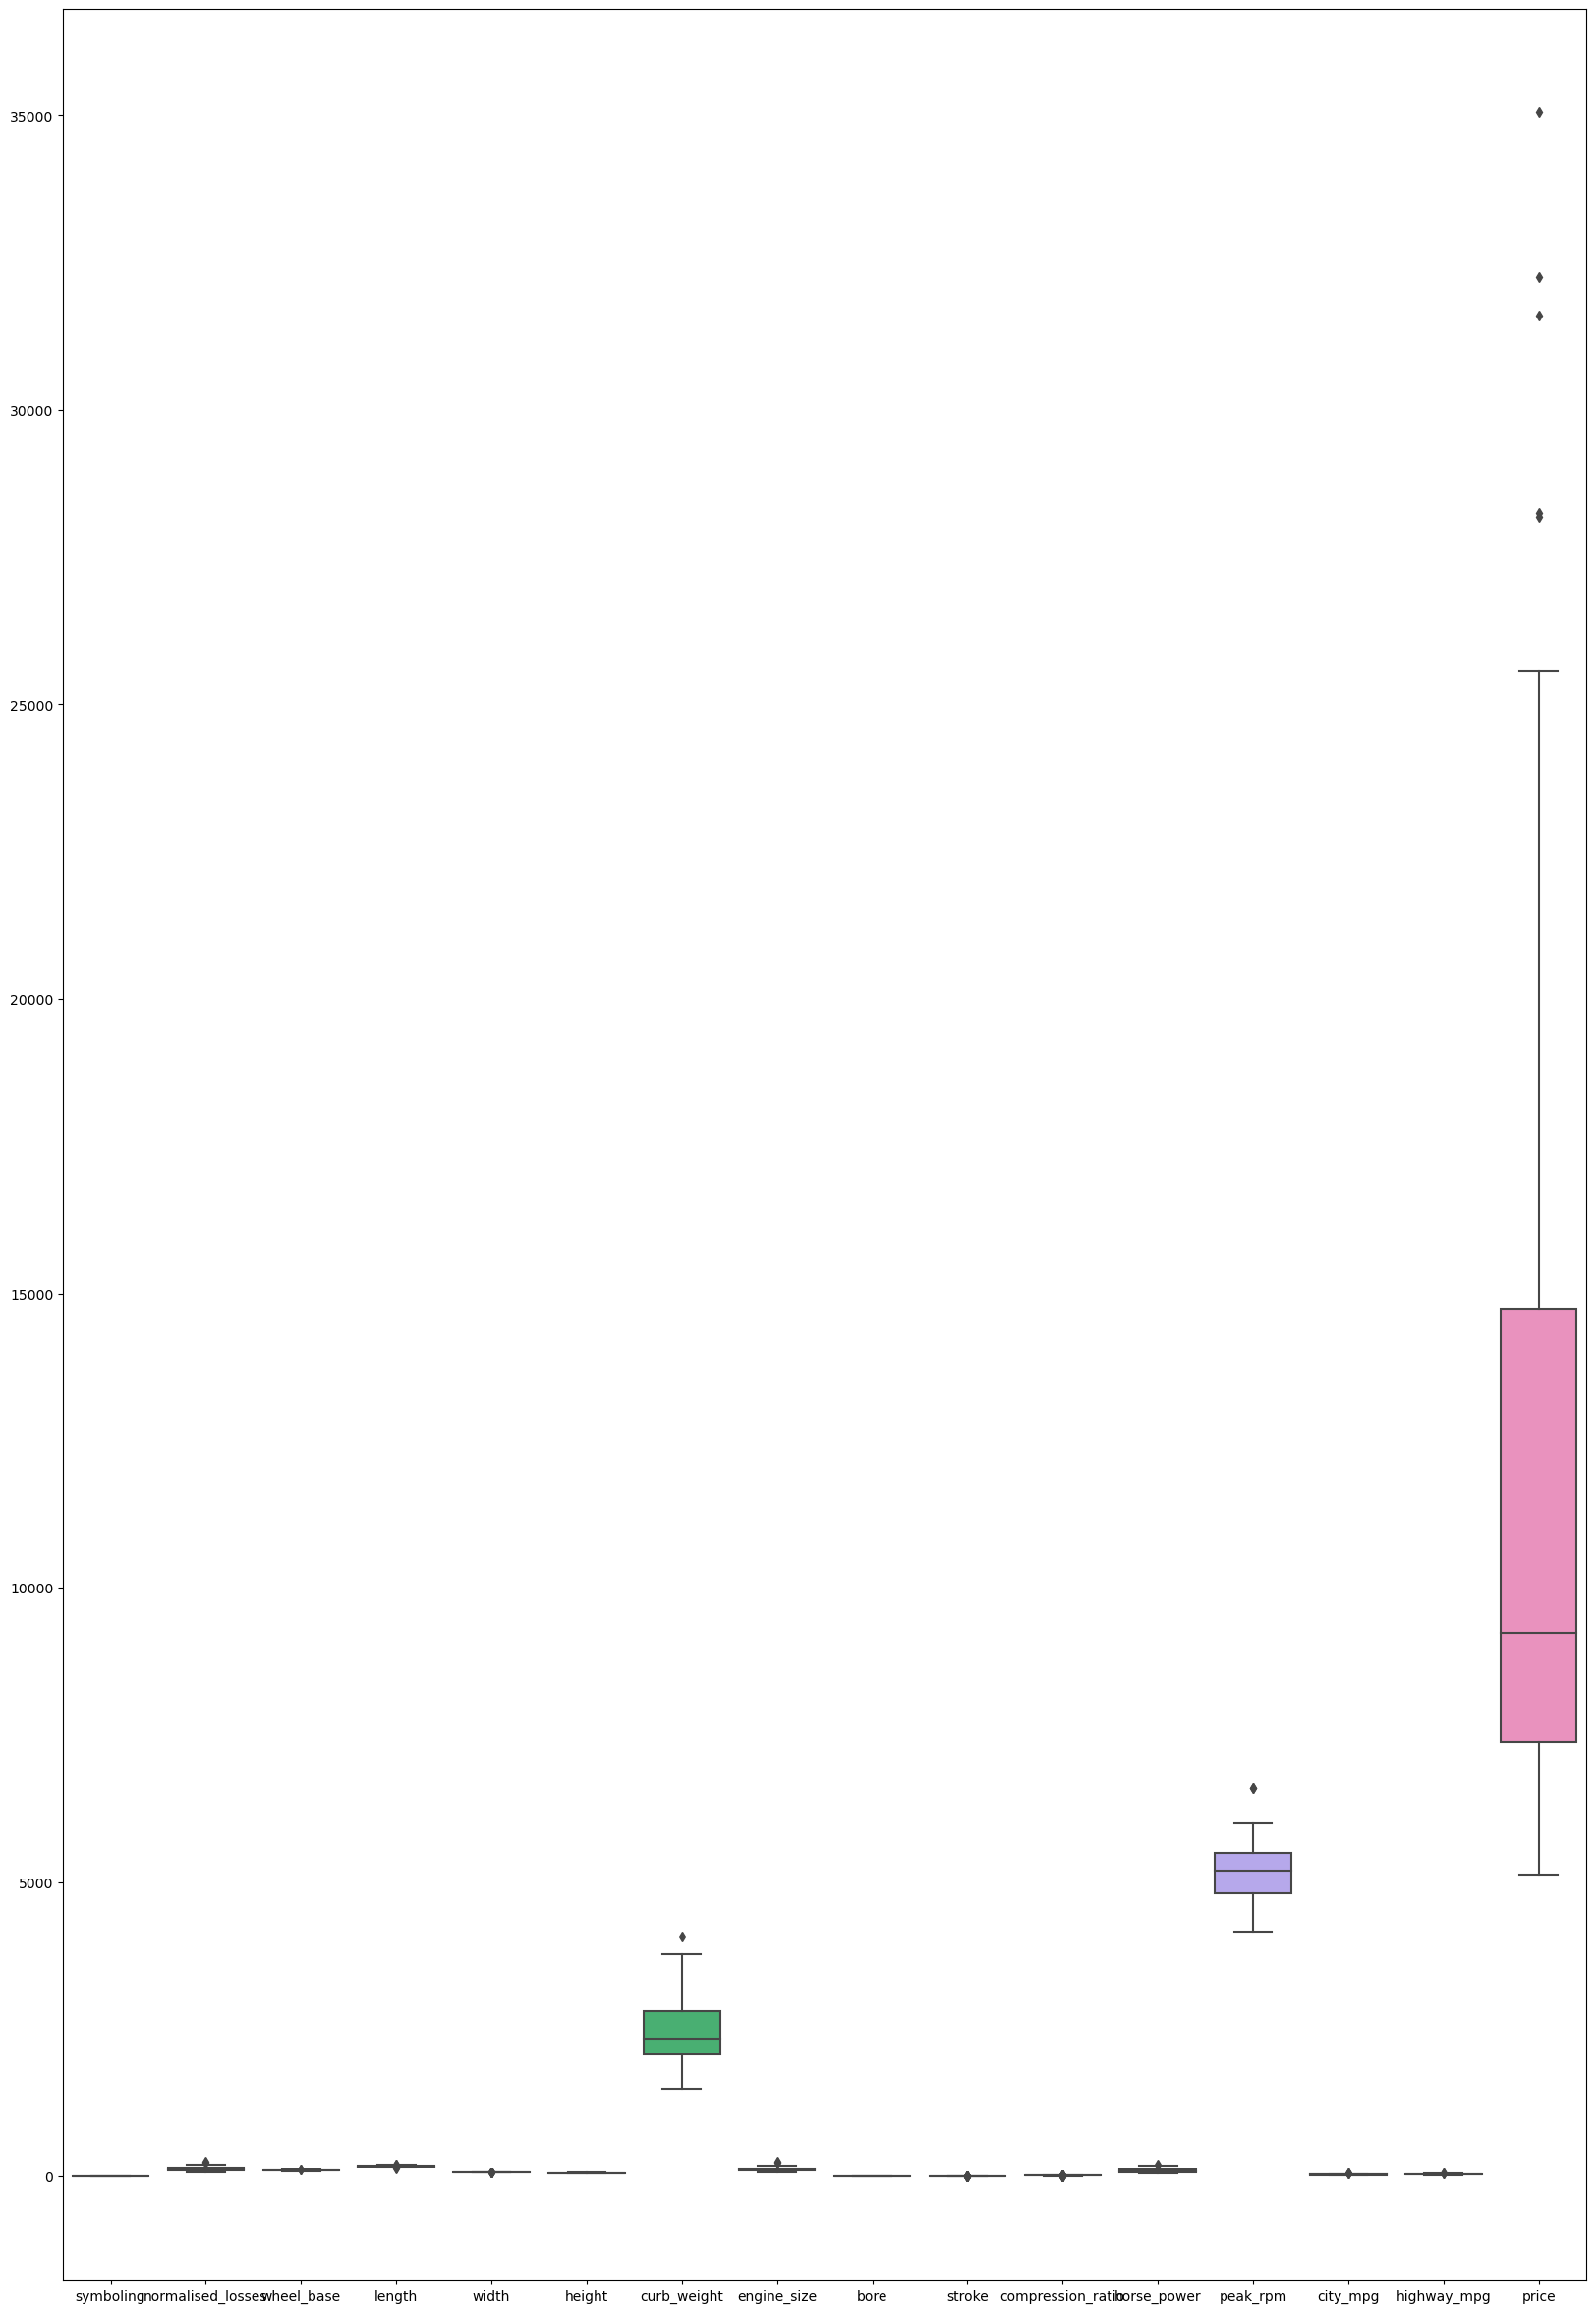

In [41]:
plt.figure(figsize=(20,30))
sns.boxplot(data)

<Axes: ylabel='count'>

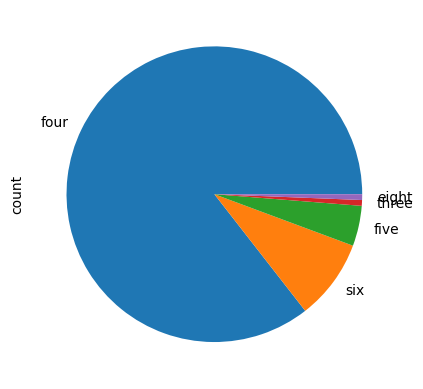

In [42]:
data['num_of_cylinders'].value_counts().plot(kind='pie')

<Axes: ylabel='count'>

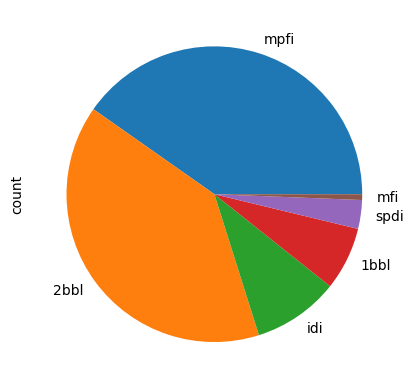

In [43]:
data['fuel_system'].value_counts().plot(kind='pie')

<Axes: ylabel='count'>

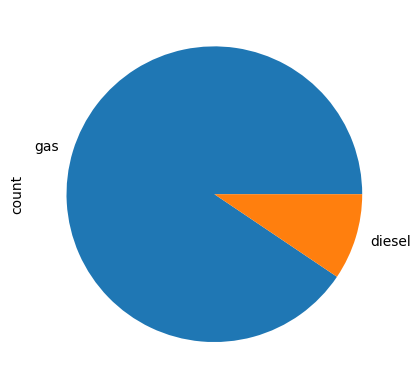

In [44]:
data['fuel_type'].value_counts().plot(kind='pie')

<Axes: ylabel='count'>

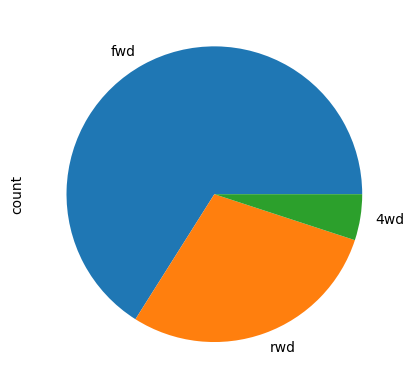

In [45]:
data['drive_wheels'].value_counts().plot(kind='pie')

In [46]:
data.select_dtypes(include=np.number).corr()

,symboling,normalised_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horse_power,peak_rpm,city_mpg,highway_mpg,price
symboling,1.000000,0.518344,-0.520591,-0.336257,-0.219186,-0.475185,-0.251880,-0.109453,-0.256469,-0.021285,-0.138316,-0.003949,0.199106,0.089550,0.149830,-0.162794
normalised_losses,0.518344,1.000000,-0.060086,0.035541,0.109726,-0.413702,0.125858,0.207820,-0.031558,0.063330,-0.127259,0.290511,0.237697,-0.235523,-0.188564,0.202761
wheel_base,-0.520591,-0.060086,1.000000,0.871534,0.814991,0.555767,0.810181,0.649206,0.578159,0.167449,0.291431,0.516948,-0.289234,-0.580657,-0.611750,0.734419
length,-0.336257,0.035541,0.871534,1.000000,0.838338,0.499251,0.871291,0.725953,0.646318,0.121073,0.184814,0.672063,-0.234074,-0.724544,-0.724599,0.760952
width,-0.219186,0.109726,0.814991,0.838338,1.000000,0.292706,0.870595,0.779253,0.572554,0.196619,0.258752,0.681872,-0.232216,-0.666684,-0.693339,0.843371
height,-0.475185,-0.413702,0.555767,0.499251,0.292706,1.000000,0.367052,0.111083,0.254836,-0.091313,0.233308,0.034317,-0.245864,-0.199737,-0.226136,0.244836
curb_weight,-0.251880,0.125858,0.810181,0.871291,0.870595,0.367052,1.000000,0.888626,0.645792,0.173844,0.224724,0.790095,-0.259988,-0.762155,-0.789338,0.893639
engine_size,-0.109453,0.207820,0.649206,0.725953,0.779253,0.111083,0.888626,1.000000,0.595737,0.299683,0.141097,0.812073,-0.284686,-0.699139,-0.714095,0.841496
bore,-0.256469,-0.031558,0.578159,0.646318,0.572554,0.254836,0.645792,0.595737,1.000000,-0.102581,0.015119,0.560239,-0.312269,-0.590440,-0.590850,0.533890
stroke,-0.021285,0.063330,0.167449,0.121073,0.196619,-0.091313,0.173844,0.299683,-0.102581,1.000000,0.243587,0.148804,-0.011312,-0.020055,-0.012934,0.160664


<Axes: >

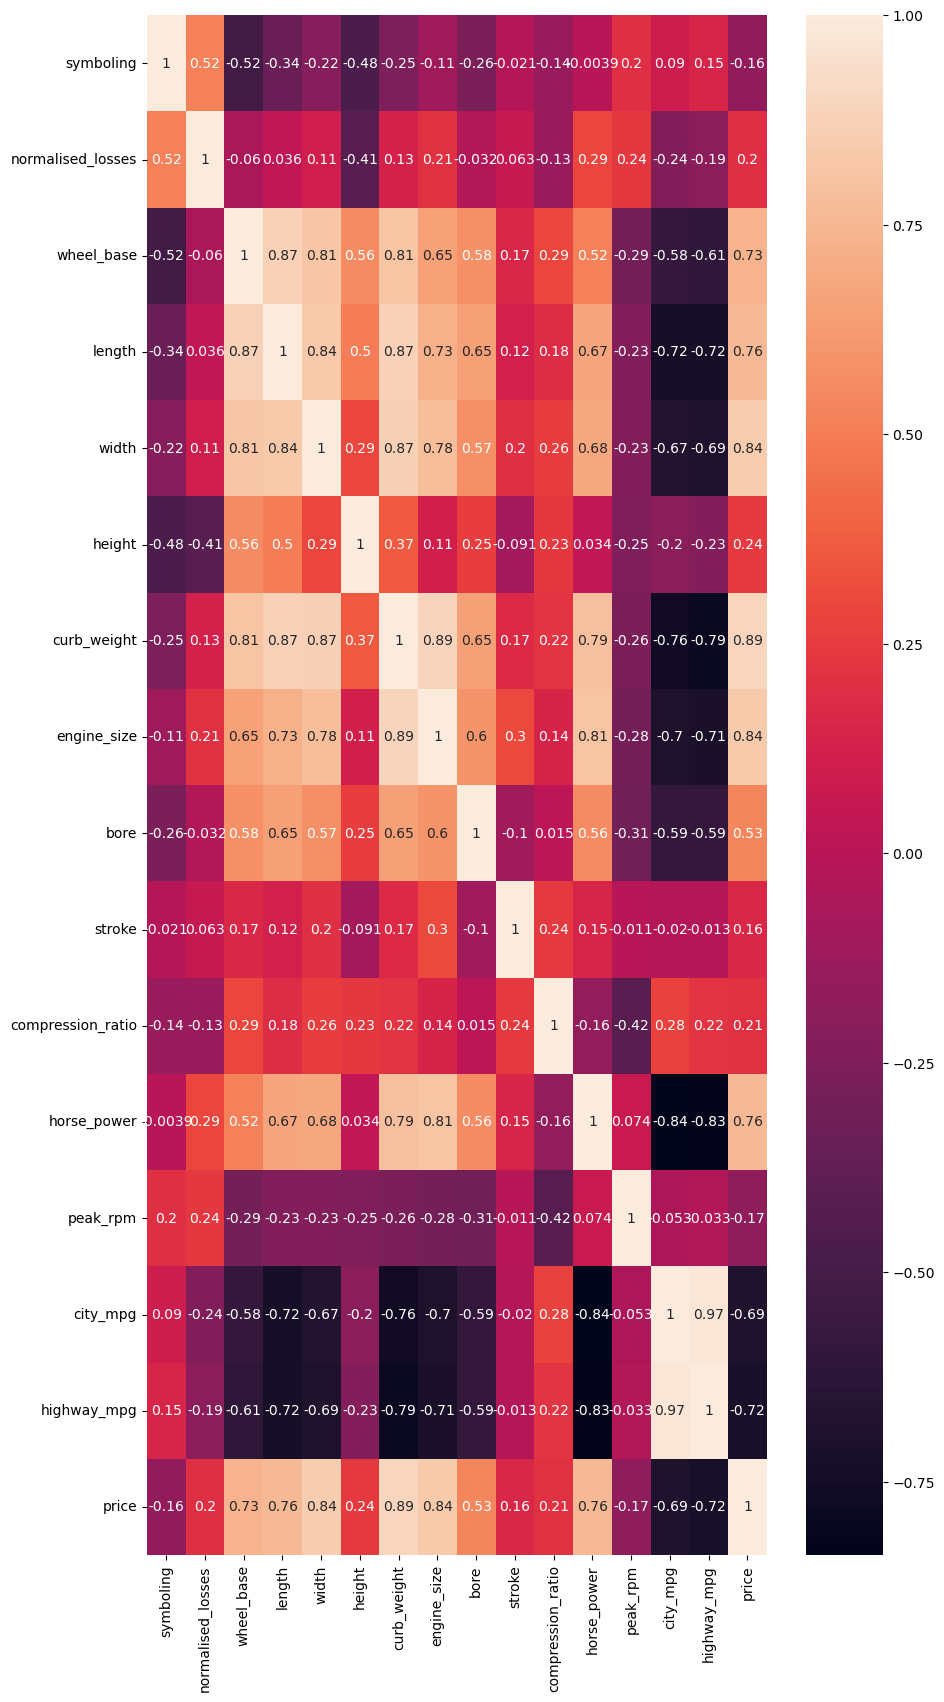

In [47]:
plt.figure(figsize=(10,20))
sns.heatmap(data.select_dtypes(include=np.number).corr(),annot=True)

In [48]:
num_cols=data.select_dtypes(include=np.number)
cat_cols=data.select_dtypes(exclude=np.number)

In [49]:
class CustomTransformer(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        X_ = X.applymap(lambda x: x.lower())
        return X_

In [61]:
categorical_preprocessing=Pipeline([('ohe',OneHotEncoder(sparse=False,handle_unknown='ignore'))])
numerical_preprocessing=Pipeline([('scaler',MinMaxScaler())])

In [62]:
cat_cols.columns

Index(['make', 'fuel_type', 'aspiration', 'num_of_doors', 'car_style',
       'drive_wheels', 'engine_location', 'engine_type', 'num_of_cylinders',
       'fuel_system'],
      dtype='object')

In [63]:
full_preprocessing=ColumnTransformer(
                 transformers=
                  [
                  ('numerical_preprocessing',numerical_preprocessing,['symboling', 'normalised_losses', 'wheel_base', 
                  'length', 'width','height', 'curb_weight','engine_size', 'bore', 'stroke',
       'compression_ratio', 'horse_power', 'peak_rpm', 'city_mpg', 'highway_mpg'],),
                      ('categorical_preprocessing',categorical_preprocessing,['make', 'fuel_type', 'aspiration', 'num_of_doors',
                        'car_style', 'drive_wheels', 'engine_location', 'engine_type', 'num_of_cylinders','fuel_system'])
                  ])

# Pipeline method by using linear regression

In [64]:
pipe_linear_reg=Pipeline([
    ('preprocess',full_preprocessing),
    ('Linear_reg_model',LinearRegression())
])

In [65]:
X=data.drop(columns=['price'])
y=data['price']

In [66]:
pipe_linear_reg.fit(X,y)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerical_preprocessing',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['symboling',
                                                   'normalised_losses',
                                                   'wheel_base', 'length',
                                                   'width', 'height',
                                                   'curb_weight', 'engine_size',
                                                   'bore', 'stroke',
                                                   'compression_ratio',
                                                   'horse_power', 'peak_rpm',
                                                   'city_mpg', 'highway_mpg']),
                                                 ('categorical_preprocessing',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['make', 'fuel_type',
                                                   'aspiration', 'num_of_doors',
                                                   'car_style', 'drive_wheels',
                                                   'engine_location',
                                                   'engine_type',
                                                   'num_of_cylinders',
                                                   'fuel_system'])])),
                ('Linear_reg_model', LinearRegression())])

In [67]:
from sklearn import set_config

In [68]:
set_config(display='diagram')
display(pipe_linear_reg)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerical_preprocessing',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['symboling',
                                                   'normalised_losses',
                                                   'wheel_base', 'length',
                                                   'width', 'height',
                                                   'curb_weight', 'engine_size',
                                                   'bore', 'stroke',
                                                   'compression_ratio',
                                                   'horse_power', 'peak_rpm',
                                                   'city_mpg', 'highway_mpg']),
                                                 ('categorical_preprocessing',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['make', 'fuel_type',
                                                   'aspiration', 'num_of_doors',
                                                   'car_style', 'drive_wheels',
                                                   'engine_location',
                                                   'engine_type',
                                                   'num_of_cylinders',
                                                   'fuel_system'])])),
                ('Linear_reg_model', LinearRegression())])

In [69]:
pipe_linear_reg.predict(X)

array([13784., 17412., 19240., 21822., 16860., 17712., 20032., 21168.,
        5136.,  6400.,  7116.,  4456.,  5224.,  9584.,  6788.,  6920.,
        6920.,  8412., 12848.,  5202.,  6254.,  6838.,  7482.,  7562.,
        7896.,  7188.,  8546.,  8818.,  8740.,  8424., 11784., 11768.,
       32560.,  5896.,  6736.,  6768.,  7240.,  7220.,  9752., 10116.,
        9752., 10116., 10172., 15976., 27976., 28616., 26992., 30432.,
       34966.,  5152.,  6064.,  6368.,  8400.,  9760.,  8256.,  8508.,
        8716.,  9988.,  7912.,  6156.,  6428.,  6300.,  7224.,  7572.,
        6476.,  7208.,  7396.,  7636.,  7976.,  9460.,  9364., 14768.,
       15248., 14248., 16040., 18520., 18344., 14208., 16184., 15232.,
       16472., 14496., 16472., 16700.,  5080.,  8592.,  7220.,  6444.,
        7452.,  8588., 22250., 13086., 13900., 14970., 14228., 17492.,
       18316.,  6184.,  6928.,  6548.,  7472.,  8156.,  9252.,  7948.,
       11952.,  8316.,  9604.,  8572., 11684.,  5480.,  6424.,  7060.,
      

In [70]:
Linear_reg_pred=pd.DataFrame(pipe_linear_reg.predict(X))

In [71]:
joblib.dump(pipe_linear_reg,'Linear_reg_model.pkl')

['Linear_reg_model.pkl']